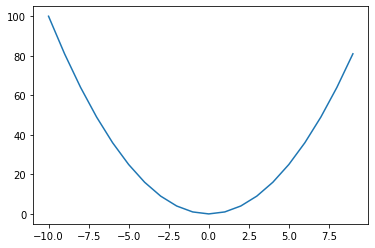

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(-10,10,1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

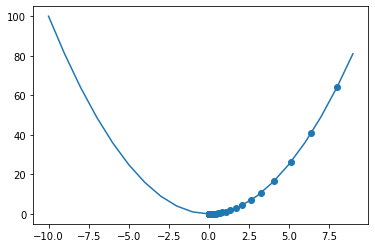

In [5]:
x_new = 10
derivative = []
y = []
learng_rate= 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate *2* old_value
    y.append(x_new ** 2)

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [9]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [10]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

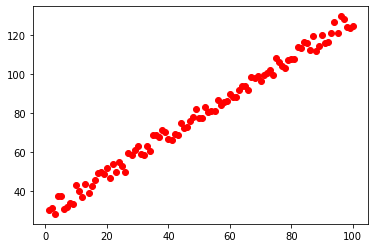

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = 1 # (2) 데이터 x의 상수항에는 1
        x[i][1] = i # (3) 데이터 x 값은 1씩 증가시킴
        y[i] = (i+bias) + random.uniform(0, 1) * variance
        # (4) 데이터 y에 bias 생성
    return x, y

x, y = gen_data(100, 25, 10) # (1) 100개의 데이터 생성

plt.plot(x[:,1]+1,y,"ro") # (5) 데이터 x와 y의 상관관계 그래프 작성
plt.show()

In [12]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose() # (6)
    theta_list = [] # (7)
    cost_list = [] # (8)
    for i in range(0, numIterations): # (9)
        hypothesis = np.dot(x, theta) # (10)
        loss = hypothesis - y # (11)
        cost = np.sum(loss ** 2) / (2 * m) # (12)
        gradient = np.dot(xTrans, loss) / m # (13)
        theta = theta - alpha * gradient # (14)
        if i % 250 == 0: # (15)
            theta_list.append(theta)
        cost_list.append(cost)
    return theta,np.array(theta_list), cost_list # (16)

m, n = np.shape(x) # (1)
numIterations= 5000 # (2)
alpha = 0.0005 # (3)
theta = np.ones(n) # (4)

theta,theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations) # (5)

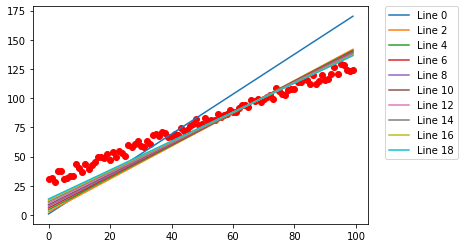

In [13]:
y_predict_step= np.dot(x, theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range (0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i], label='Line %d'%i)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

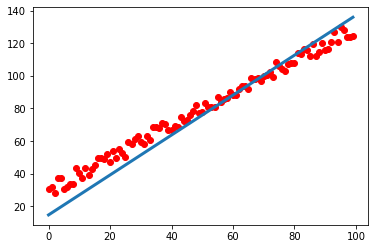

In [14]:
y_predict= np.dot(x, theta)
plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3)
plt.show()

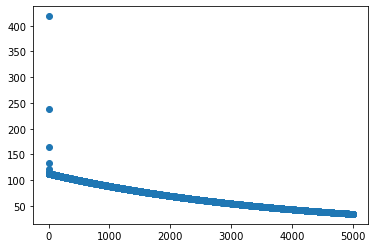

In [15]:
iterations = range(len(cost_list))

plt.scatter(iterations,cost_list)
plt.show()